In [1]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# RegEx
import re

# Reading the Dataset


In [2]:
athlete = pd.read_csv("/content/athlete_events.csv")
noc = pd.read_csv("/content/noc_regions.csv")

# Creating the copy of the DataFrame

In [4]:
ath = athlete.copy()
nat = noc.copy()

# Data Exploration

In [5]:
ath.head(1)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [6]:
ath.tail()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
7983,4419,Anne Elizabeth Alice Louise Mountbatten-Windso...,F,25.0,167.0,57.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",NaN
7984,4420,Mame-Ibra Anne,M,26.0,184.0,80.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN
7985,4421,Adrien Anneet,M,19.0,NaN,NaN,Belgium,BEL,1928 Summer,1928,Summer,Amsterdam,Boxing,Boxing Men's Welterweight,NaN
7986,4422,Jolanda Annen,F,23.0,166.0,56.0,Switzerland,SUI,2016 Summer,2016,Summer,Rio de Janeiro,Triathlon,Triathlon Women's Olympic Distance,NaN
7987,4423,Martin Annen,M,27.0,181.0,98.0,Switzerland-2,SUI,2002 Winter,2002,Winter,Salt Lake Cit,NaN,NaN,NaN


In [7]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7988 entries, 0 to 7987
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      7988 non-null   int64  
 1   Name    7988 non-null   object 
 2   Gender  7988 non-null   object 
 3   Age     7597 non-null   float64
 4   Height  6197 non-null   float64
 5   Weight  6161 non-null   float64
 6   Team    7988 non-null   object 
 7   NOC     7988 non-null   object 
 8   Games   7988 non-null   object 
 9   Year    7988 non-null   int64  
 10  Season  7988 non-null   object 
 11  City    7988 non-null   object 
 12  Sport   7987 non-null   object 
 13  Event   7987 non-null   object 
 14  Medal   968 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 936.2+ KB


In [9]:
ath.describe()

,ID,Age,Height,Weight,Year
count,7988.000000,7597.000000,6197.000000,6161.000000,7988.00000
mean,2247.272534,25.340661,175.353881,71.071904,1980.85979
std,1293.510694,6.093514,10.360722,14.250286,28.48335
min,1.000000,13.000000,132.000000,38.000000,1896.00000
25%,1103.750000,21.000000,168.000000,62.000000,1964.00000
50%,2300.500000,24.000000,175.000000,70.000000,1988.00000
75%,3364.250000,28.000000,182.000000,79.000000,2004.00000
max,4423.000000,75.000000,215.000000,163.000000,2016.00000


In [10]:
ath.shape

(7988, 15)

In [11]:
ath.isnull().sum()

ID           0
Name         0
Gender       0
Age        391
Height    1791
Weight    1827
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        1
Event        1
Medal     7020
dtype: int64

# Data Cleaning & Data Manipulation

1. Add a new column "region" to the ath DataFrame. And the region column should have the regions according to the elements in the NOC columns of the "nat" DataFrame.

In [12]:
region_col = ath['NOC'].map(nat.set_index('NOC')['region'])
ath.insert(7, 'region', region_col)

In [13]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,region,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7983,4419,Anne Elizabeth Alice Louise Mountbatten-Windso...,F,25.0,167.0,57.0,Great Britain,UK,GBR,1976 Summer,1976,Summer,Montreal,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",NaN
7984,4420,Mame-Ibra Anne,M,26.0,184.0,80.0,France,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN
7985,4421,Adrien Anneet,M,19.0,NaN,NaN,Belgium,Belgium,BEL,1928 Summer,1928,Summer,Amsterdam,Boxing,Boxing Men's Welterweight,NaN
7986,4422,Jolanda Annen,F,23.0,166.0,56.0,Switzerland,Switzerland,SUI,2016 Summer,2016,Summer,Rio de Janeiro,Triathlon,Triathlon Women's Olympic Distance,NaN


2. Drop the columns "NOC" from the DataFrame "ath"

In [14]:
ath.drop("NOC", inplace = True, axis =1)

In [15]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


3. Handling the null values in the columns - "Age", "Height" & "Weight" by the mean of the respective columns.

In [16]:
ath.isnull().sum()

ID           0
Name         0
Gender       0
Age        391
Height    1791
Weight    1827
Team         0
region      15
Games        0
Year         0
Season       0
City         0
Sport        1
Event        1
Medal     7020
dtype: int64

In [17]:
ath[ath.Age.isnull()].head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,Iran,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN
152,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,Bulgaria,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN
153,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,Bulgaria,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,Sudan,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN
212,102,Sayed Fahmy Abaza,M,NaN,NaN,NaN,Egypt,Egypt,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [18]:
ath['Age'].fillna(ath.Age.mean(), inplace=True)
ath['Height'].fillna(ath.Height.mean(), inplace=True)
ath['Weight'].fillna(ath.Weight.mean(), inplace=True)

In [19]:
ath.iloc[[147]]

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,25.340661,175.353881,71.071904,Iran,Iran,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN


In [20]:
ath.isnull().sum()

ID           0
Name         0
Gender       0
Age          0
Height       0
Weight       0
Team         0
region      15
Games        0
Year         0
Season       0
City         0
Sport        1
Event        1
Medal     7020
dtype: int64

4. List out all the values of the region columns where the values are null.

In [21]:
ath[ath.region.isna()].head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21.0,175.353881,71.071904,Singapore,NaN,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25.0,175.353881,71.071904,Singapore,NaN,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.000000,68.000000,Singapore,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
6267,3515,Paulo Amotun Lokoro,M,24.0,170.000000,61.000000,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7659,4264,Ang Peng Siong,M,21.0,180.000000,75.000000,Singapore,NaN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN


In [22]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [23]:
nat.where(nat['region']=='Singapore')

,NOC,region,notes
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
225,NaN,NaN,NaN
226,NaN,NaN,NaN
227,NaN,NaN,NaN
228,NaN,NaN,NaN


5. Handling the null values in the column "Medals"

In [44]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.353881,71.071904,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.353881,71.071904,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [45]:
ath['Medal'].unique()

array([0, 1, 3, 2])

In [46]:
ath['Medal'].nunique()

4

In [47]:
ath['Medal'].value_counts()

0    7020
3     343
1     332
2     293
Name: Medal, dtype: int64

Replace
 NaN with 0
 Gold with 1
 Silver with 2
 Bronze with 3

In [31]:
# ath.Medal = ath.Medal.replace({"NaN":0, "Gold":1, "Silver":2, "Bronze":3,})
ath['Medal'].replace([np.nan],[0], inplace=True)

In [42]:
ath.tail()

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
7983,4419,Anne Elizabeth Alice Louise Mountbatten-Windso...,F,25.0,167.000000,57.000000,Great Britain,1976,Summer,Montreal,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",0
7984,4420,Mame-Ibra Anne,M,26.0,184.000000,80.000000,France,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,0
7985,4421,Adrien Anneet,M,19.0,175.353881,71.071904,Belgium,1928,Summer,Amsterdam,Boxing,Boxing Men's Welterweight,0
7986,4422,Jolanda Annen,F,23.0,166.000000,56.000000,Switzerland,2016,Summer,Rio de Janeiro,Triathlon,Triathlon Women's Olympic Distance,0
7987,4423,Martin Annen,M,27.0,181.000000,98.000000,Switzerland-2,2002,Winter,Salt Lake Cit,NaN,NaN,0


In [33]:
ath['Medal'].value_counts()

0.0    7020
3.0     343
1.0     332
2.0     293
Name: Medal, dtype: int64

In [34]:
ath.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7988 entries, 0 to 7987
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      7988 non-null   int64  
 1   Name    7988 non-null   object 
 2   Gender  7988 non-null   object 
 3   Age     7988 non-null   float64
 4   Height  7988 non-null   float64
 5   Weight  7988 non-null   float64
 6   Team    7988 non-null   object 
 7   region  7973 non-null   object 
 8   Games   7988 non-null   object 
 9   Year    7988 non-null   int64  
 10  Season  7988 non-null   object 
 11  City    7988 non-null   object 
 12  Sport   7987 non-null   object 
 13  Event   7987 non-null   object 
 14  Medal   7988 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 936.2+ KB


In [35]:
ath.Medal = ath.Medal.astype(int)

In [36]:
ath.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7988 entries, 0 to 7987
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      7988 non-null   int64  
 1   Name    7988 non-null   object 
 2   Gender  7988 non-null   object 
 3   Age     7988 non-null   float64
 4   Height  7988 non-null   float64
 5   Weight  7988 non-null   float64
 6   Team    7988 non-null   object 
 7   region  7973 non-null   object 
 8   Games   7988 non-null   object 
 9   Year    7988 non-null   int64  
 10  Season  7988 non-null   object 
 11  City    7988 non-null   object 
 12  Sport   7987 non-null   object 
 13  Event   7987 non-null   object 
 14  Medal   7988 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 936.2+ KB


In [37]:
ath.isnull().sum()

ID         0
Name       0
Gender     0
Age        0
Height     0
Weight     0
Team       0
region    15
Games      0
Year       0
Season     0
City       0
Sport      1
Event      1
Medal      0
dtype: int64

6. dropping off the un-wanted/irrelavant columns

In [38]:
ath.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0


In [39]:
ath.drop(["region","Games"],axis = 1,inplace =True)

In [49]:
ath.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0


7. Changing the dtype of the "Age" column as int

In [53]:
ath.Age = ath.Age.astype(int)


# Exportation of the DataFrame

In [54]:
# Export to JSON
ath.to_json("athletes_dataset.json")

# Export to Excel
ath.to_excel("athletes_dataset.xlsx")

# Export to .CSV
ath.to_csv("athletes_dataset.csv")

# Data Analysis

1. Show the relationship between Height and Weight

Text(0, 0.5, 'Weight')

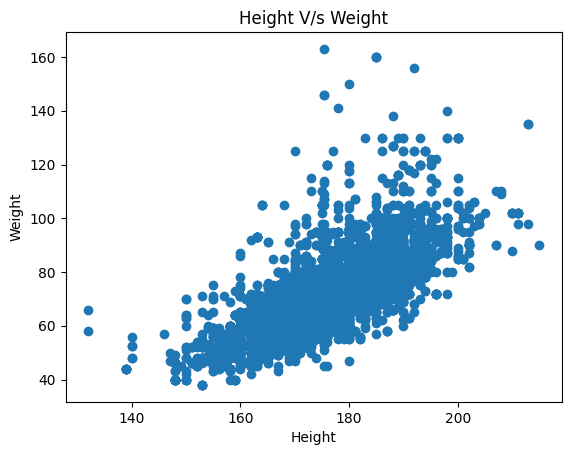

In [55]:
x = ath.Height
y = ath.Weight
plt.scatter(x,y)
plt.title("Height V/s Weight")
plt.xlabel("Height")
plt.ylabel("Weight")

Conclusion:

2. Find out how many male and female had participated in the Olympics during 1896 to 2016

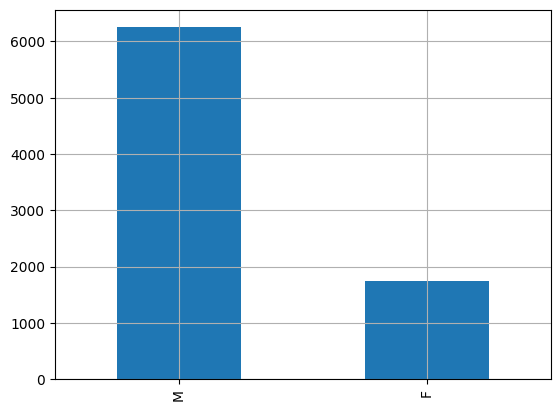

In [61]:
ath['Gender'].value_counts().plot.bar(ath['Gender'])
plt.grid()

3. How many Male and Female have participated in the Summer and Winter Olympics

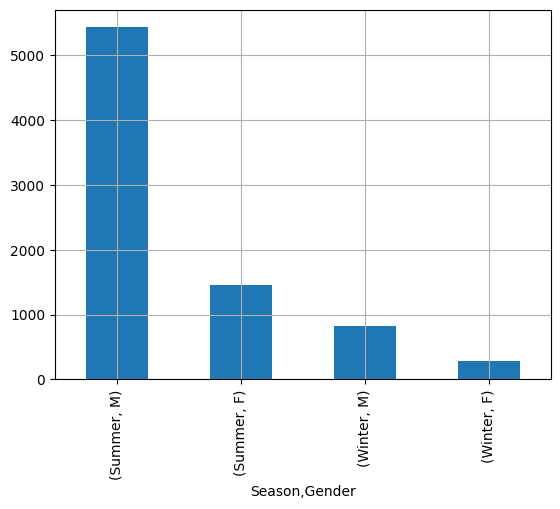

In [62]:
ath['Gender'].groupby(ath['Season']).value_counts().plot.bar(ath['Gender'])
plt.grid()
plt.show()

In [63]:
import plotly.express as px

In [64]:
fig = px.histogram(ath, x=ath.Season, color=ath.Gender, barmode = "group",
                   color_discrete_map={"M":"#BA55D3", "F":"#DEB887"})
fig.show()

4. Name the Top 5 countries who have the most medals

In [65]:
ath.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0


In [66]:
(ath.groupby(ath['Team'])['Medal'].sum()).sort_values(ascending=False).head(5)

Team
Sweden           198
Soviet Union     155
United States    151
Russia            95
Norway            95
Name: Medal, dtype: int64

In [67]:
fig = px.histogram(ath.Medal, x = ath.Team)
fig.show()

In [68]:
fig = px.histogram(ath[ath['Gender']=='F']['Gender'], x=ath.Year)
fig.show()